<a href="https://colab.research.google.com/github/HalyshAnton/Python-AI/blob/main/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%D0%B8%D1%87%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Побудова моделі для аналізу табличних даних

## EDA(exploratory data analysis - розвідувальний аналіз даних)

Перед початком побудови моделі потрібно проаналізувати дані, це допоможе вирішити яку саме модель потрібно обрати та чи потрібно генерувати нові дані

### Аналіз викидів

Перш за все потрібно перевірити викиди.в загальному випадку, якщо модель показує хороші результати на "брудних" даних, то чистити викиди не треба, адже як не як вони репрезентують певні реальні випадки, хоч і дуже рідкісні


Якщо викиди надто сильно виділяються(якщик просто не видно), або модель показує жахливі результати, то їх потрібно почистити

In [1]:
import numpy as np
import matplotlib.pyplot as plt

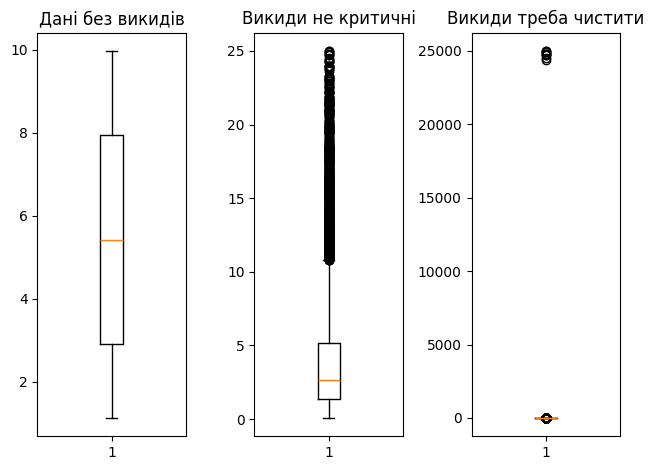

In [100]:
data = np.random.uniform(1, 10, 100)

plt.subplot(1, 3, 1)
plt.title('Дані без викидів')
plt.boxplot(data)

data = np.random.lognormal(1, 1, 10000)
data = data[data<25]
plt.subplot(1, 3, 2)
plt.title('Викиди не критичні')
plt.boxplot(data)

data.sort()
data[-10:] *= 1000
plt.subplot(1, 3, 3)
plt.title('Викиди треба чистити')
plt.boxplot(data)

plt.tight_layout()
plt.show()

Для категоріальних даних краще вивести кількості категорій та вирішити, яких категорії замало. Категорії, яких дуже мало вважаємо викидами.

* Якщо таких категорій небагато, то можна їх просто видалити
* Якщо їх кількість значно, то при побудові препроцесора у `OrdinalEncoder` можна вказати параметр `min_frequency`, а саме кількість даних у незначних категоріях(може бути число або відсоток)

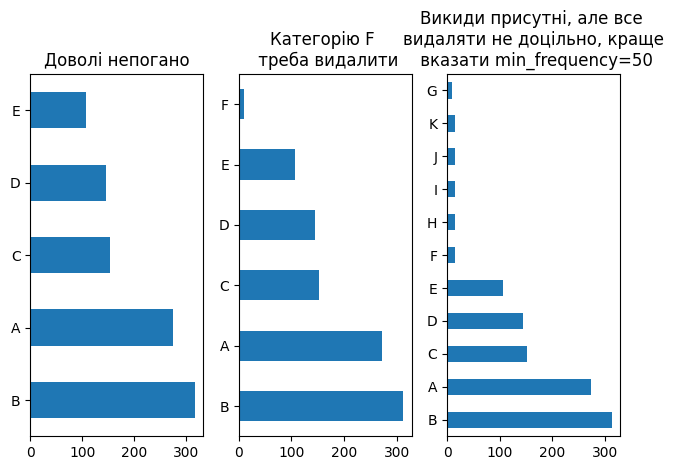

In [32]:
import pandas as pd

data = np.random.choice(['A', 'B', 'C', 'D', 'E'], p=[0.3, 0.3, 0.15, 0.15, 0.1], size=1000)
data = pd.Series(data)

plt.subplot(1, 3, 1)
plt.title('Доволі непогано')
data.value_counts().plot(kind='barh')

data[-10:] = ['F']*10
plt.subplot(1, 3, 2)
plt.title('Категорію F \n треба видалити')
data.value_counts().plot(kind='barh')

data = list(data) + ['F']*5 + ['G']*10 + ['H']*15 + ['I']*15 + ['J']*15 + ['K']*15
data = pd.Series(data)
plt.subplot(1, 3, 3)
plt.title('Викиди присутні, але все \nвидаляти не доцільно, краще\n вказати min_frequency=50')
data.value_counts().plot(kind='barh')

plt.tight_layout()
plt.show()

### Створення нових даних(feature engineering)

Часто та таблиця, яку ви отримали не містить тих даних які були б сильно інформативними під вашк конкретну задачу, що виливається у погані метрики моделі. В такому випадку вам потрібно самим згенерувати ті дані, які б були інформативними.

Способів це зробити є багато, і все залежить від конкретної задачі та даних, але ми дупинемось на ковзаючих вікнах для часових даних. Суть полягає в тому, щоб на основі минулих данх спрогнозувати майбутнє.

Наприклад: маючи дані про активність корстувачів на сайті за ціле літо, спрогнозувати їхню поведінку за жовтень

Для реалізації цієї ідеї потрібно вибрати 3 часові діапазони:
* window_X -- розмір вікна для минулих даних, це та інформація яка нам відома
* window_у -- розмір вікна для майбутніх даних, це та інформація яку ми не знаємо, але хочемо спрогнозувати, використовуючи дані з минулого
* gap -- невеликий проміжок між двома вікнами, потрібний щоб зробити прогноз моделі на майбутнє та підготуватись

Нижче гаведено графік для

window_X = 40 днів

gap = 20 днів

window_y = 30 днів

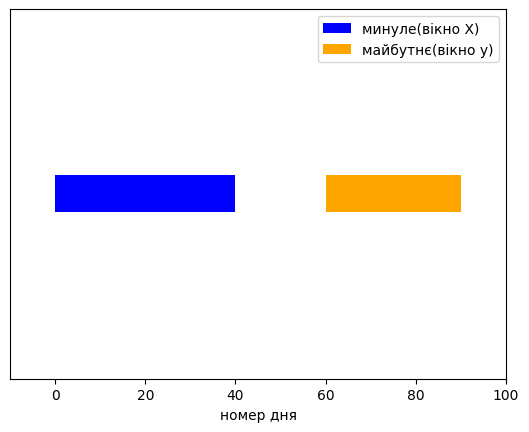

In [89]:
size = 40
gap = 20
size_y = 30
k = np.arange(0, 1)
y = k * size

line2 = plt.barh(k, y+size+gap+size_y, color='orange', height=0.2)
plt.barh(k, y+size+gap, color='white', height=0.2)
line1 = plt.barh(k, y+size, color='blue', height=0.2)
plt.barh(k, y, color='white', height=0.2)

plt.legend([line1, line2], ['минуле(вікно Х)', 'майбутнє(вікно у)'])


plt.ylim([-1, 1])
plt.xlim([-10, 100])
plt.yticks([])
plt.xlabel('номер дня')

plt.show()

Коли з ромірами діапазонів вирішено, усі дані діляться на декілька вікон, їхня кількість залежить від загального часового проміжку в даних.

Наприклад, якщо у вас є таблиця з даними за останні 250 днів, то з вище вказаними діапазонами у вас вийде 5 вікон


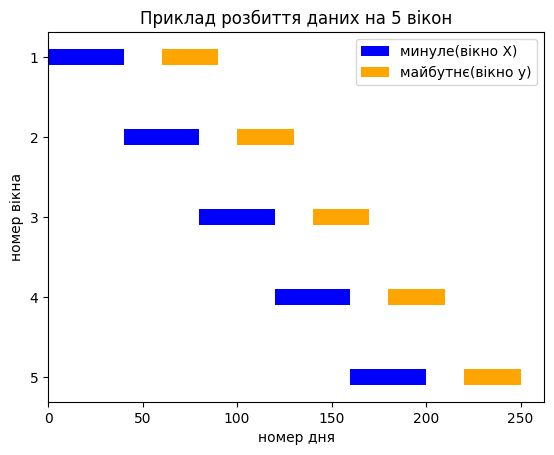

In [98]:
size = 40
gap = 20
size_y = 30
k = np.arange(0, 5)
y = k * size

k = k[::-1]
line2 = plt.barh(k, y+size+gap+size_y, color='orange', height=0.2)
plt.barh(k, y+size+gap, color='white', height=0.2)
line1 = plt.barh(k, y+size, color='blue', height=0.2)
plt.barh(k, y, color='white', height=0.2, tick_label=k[::-1]+1)

plt.legend([line1, line2], ['минуле(вікно Х)', 'майбутнє(вікно у)'])

plt.title("Приклад розбиття даних на 5 вікон")
plt.ylabel('номер вікна')
plt.xlabel('номер дня')

plt.show()

Зверніть увагу, що кінець сині частини(минуле) усіх вікон не мають спільних даних. Фактично це зроблено щоб не дублювати дані.

Хоча при цьому, оранжева частина(майбутнє) одного вікна може мати мати спільні дані з синьою частиною(минулим) іншого вікна. В цьому не повинно бути нічого дивного.

#### Приклад
У вас є дані про активність користувачів за ціле літо(window_X = 3 місяці) і ви хочете спрогнозувати їхню активність на листопад(window_y = 1 місяць), часу проаналізувати результати моделі у вас 2 місяці(gap). Ось ви це зробили, компанія отримала додаткові прибутки через успішний маркетинг і всі задоволені.

Час іде і на дворі Новий Рік, у компанії амбітні плани в цьому році і вони просять вас знову спрогнозувати активність користувачів на майбутнє, щоб підготуватись. Дивлячись на параметри вашої моделі вам потрібні дані за попередні 3 місяці, тобто жовтень, листопад та грудень. Тільки от дані за листопад ви берете не спрогнозовані наприкінці літа, а реальні. Ось відмінність, раніше ви прогнузували що відбудеться в листопаді, а тепер вам відомо що сталось на справді.

Отже, ви берете дані за остання 3 місяці, даєте 2 місяці на підготовку, і робите прогноз на цілий березень

### Feature engineering
Наведемо приклад для одного вікна: у вас є дані про активність користувача на сайті за рік, а саме
* дата
* ім'я користувача
* скільки часу користувач провів на сайті(хв/день)
* витрати користувача(expenses -- те що потрібно буде прогнозувати в майбутньому)
* window_X = 3 місяці
* window_y = 1 місяць
* gap = 2 місяці

Отже перше вікно буде таким:
* дані минулого(Х) - з 01-01-2020 по 03-01-2020(тут формат місяць-число-рік)

* дані майбутнього(у) - з 05-01-2020 по 06-01-2020(тут формат місяць-число-рік)

На основі Х, для кожного користувача знаходимо
* скільки всередньому проведено часу
* загальний час, проведений на сайті
* мінімальний час, проведений на сайті
* максимальний час, проведений на сайті
* скільки всередньому витрачено грошей
* загальна сума, яку витрачено
* мінімальна сума, яку витрачено
* максимальна сума, яку витрачено

На основі у, для кожного користувача знаходимо
* загальна сума, яка буде витрачена

Далі отримані характеристики порібно об'єднати


In [152]:
df = pd.DataFrame({'date': pd.date_range('01-01-2020', '30-12-2020', freq='D')})
N = len(df)

df['user'] = np.random.choice(['John', 'Max', 'Mary'], N)
df['duration'] = np.random.uniform(10, 40, N)
df['expenses'] = np.random.lognormal(1, 1, N)

print('Усі дані')
df

Усі дані


,date,user,duration,expenses
0,2020-01-01,Mary,23.927199,2.452368
1,2020-01-02,Max,16.207011,2.049275
2,2020-01-03,John,20.316213,3.384690
3,2020-01-04,John,13.667326,4.030488
4,2020-01-05,Max,31.178991,2.246312
...,...,...,...,...
360,2020-12-26,Mary,39.344493,0.980095
361,2020-12-27,John,33.786628,0.973673
362,2020-12-28,Mary,21.798287,2.369775
363,2020-12-29,Max,31.965008,1.886667


In [153]:
pd.set_option('display.max_rows', 10)
X = df[df['date'] < pd.to_datetime('03-01-2020')]
print('Вікно в 3 місяці для минулого')
X

Вікно в 3 місяці для минулого


,date,user,duration,expenses
0,2020-01-01,Mary,23.927199,2.452368
1,2020-01-02,Max,16.207011,2.049275
2,2020-01-03,John,20.316213,3.384690
3,2020-01-04,John,13.667326,4.030488
4,2020-01-05,Max,31.178991,2.246312
...,...,...,...,...
55,2020-02-25,Max,38.785498,2.354722
56,2020-02-26,Max,26.873926,0.760798
57,2020-02-27,Mary,32.983716,1.820026
58,2020-02-28,Mary,10.817136,2.846775


In [160]:
y = df[(df['date'] < pd.to_datetime('06-01-2020')) & (df['date'] >= pd.to_datetime('05-01-2020'))]
print("Вікно в 1 місяць для майбутнього(gap = 2місяці)")
y

Вікно в 1 місяць для майбутнього(gap = 2місяці)


,date,user,duration,expenses
121,2020-05-01,Mary,30.114211,2.420903
122,2020-05-02,Mary,31.229253,5.128251
123,2020-05-03,Max,17.652475,0.629048
124,2020-05-04,Mary,17.037738,1.600646
125,2020-05-05,John,23.945008,1.653204
...,...,...,...,...
147,2020-05-27,Mary,32.937018,0.641845
148,2020-05-28,Mary,35.069399,11.197933
149,2020-05-29,John,28.260909,7.286264
150,2020-05-30,John,19.200214,0.831200


In [161]:
X_g = X.groupby(by='user').agg({
    'duration': ['mean', 'sum', 'min', 'max'],
    'expenses': ['mean', 'sum', 'min', 'max']
})

print('Характеристики користувачів з минулого')
X_g

Характеристики користувачів з минулого


duration                                    expenses              \
           mean         sum        min        max      mean         sum   
user                                                                      
John  25.185769  554.086927  12.361994  38.744711  4.894561  107.680339   
Mary  23.428007  445.132135  10.005202  38.762147  3.395469   64.513915   
Max   25.313472  480.955971  12.030710  38.785498  3.176723   60.357733   

                           
           min        max  
user                       
John  0.769573  16.238312  
Mary  0.270390  19.345844  
Max   0.270063   8.817168

In [162]:
y_g = y.groupby(by='user').agg({
    'expenses': ['sum']
})
print("Витрати користувасів у майбутньому")
y_g

Витрати користувасів у майбутньому


,expenses
,sum
user,
John,30.527487
Mary,45.577659
Max,24.532856


In [163]:
print("Об'єднані дані")
pd.merge(X_g, y_g, on='user')

Об'єднані дані


duration                                   expenses_x              \
           mean         sum        min        max       mean         sum   
user                                                                       
John  25.185769  554.086927  12.361994  38.744711   4.894561  107.680339   
Mary  23.428007  445.132135  10.005202  38.762147   3.395469   64.513915   
Max   25.313472  480.955971  12.030710  38.785498   3.176723   60.357733   

                          expenses_y  
           min        max        sum  
user                                  
John  0.769573  16.238312  30.527487  
Mary  0.270390  19.345844  45.577659  
Max   0.270063   8.817168  24.532856

## Модель

### Попередня обробка

Коли дані готові, можна будувати модель, але перед початком варто дані підготувати

Спершу дані треба різділити на відому частину(Х) та те що ви хочете спрогнозувати(у)

Далі треба попрацювати з Х

В загальному більшість моделей працює з числовими даними без пропусків. Тому, на цьому етапі вам варто створити препроцесор.

Зазвичай він складається з двох паралельних обробок: для числових та категоріальних даних

Числові містять заповнення пропусків і можливо ще додаткову обробку, такі як
* MinMaxScaler
* StandardScaler
* QuantileTransformer
* PowerTransformer
* PolynomialFeatures

Для категоріальних даних це заповнення пропусків та кодування(найчастіше OrdinalEncoder)

In [165]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder


num_columns = X_train.select_dtypes(include='number').columns
cat_columns = X_train.select_dtypes(include='object').columns


num_transformer = Pipeline(
    [
        ('impute', SimpleImputer(strategy='median'))
    ]
)

cat_transformer = Pipeline(
    [
        ('impute', SimpleImputer()),
         ('onehot', OrdinalEncoder())
    ]
)

preprocessor = ColumnTransformer(
    [
        ('num', num_transformer, num_columns),
        ('cat', cat_transformer, cat_columns)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['duration'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('onehot', OrdinalEncoder())]),
                                 Index(['user'], dtype='object'))])

### Модель

Після цього можна тренувати саму модель. Різні дані можуть потребувати різних моделей, але загальний підхід такий

* даних дуже мало -- лінійна регресія або просте дерево
* даних багато, але мало стовпчиків -- варіації лінійної регресії(SVM, Lasso, Ridge)
* даних багато і багато стовпчиків -- градієнтний бустинг

In [ ]:
full_model = Pipeline(
    [
        ('prep', preprocessor),
        ('lin reg', LinearRegression())
    ]
)

full_model.fit(X_train, y_train)

### Метрики

Для того щоб зрозуміти, наскільки модель добре прогнозує дані, використовують метрики. Для задачі регресії популярними є такі:

* R2 -- чим ближче до 1, тим краще. діапазон [0, 1]
* MSE -- чим менше, тим краще. діапазон [0, inf]
* RMSE -- чим менше, тим краще. діапазон [0, inf]
* MAE -- чим менше, тим краще. діапазон [0, inf]

На основі отриманих метрик ви вирішуєте, чи задоволені ви результатом. Якщо ні, то потрібно або змінит модель, або обробити дані по іншому

In [ ]:
from sklearn.metrics import r2_score

y_pred = full_model.predic(X_test)
r2_score(y_test, y_pred)

## Використання

Коли модель натренована, її потрібно зберегти, і використовувати в майбутньому.

Для цього вам потрібно перевести ваші дані у той самий формат, на яких ваша модель була натренована

Якщо це датафрейм з певними стовпчиками, то в такому ж вигляді треба подати їх моделі.

**Примітка** якщо ви використовували ковзаюче вікно і генерували таким чином дані, то на цьому етапі вам так само доведеться повторити цю процедуру

In [ ]:
import joblib
joblib.dump(full_model, 'my_model.pkl')

In [ ]:
load_model = joblib.load('my_model.pkl')
load_model

In [ ]:
data = pd.DataFrame({
    "age": [100],
    'duration': [45]
})

load_model.predict(data)